# Assignment 1: Problem C
In this problem, you will implement a linear perceptron as discussed in class. You have two different datasets for this assignment on which you need to train and test your model independently. Create 70:30 train-test splits on both the datasets and train the model for a maximum of 106 iterations in case the model does not converge on the given dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#creating a 70:30 train-test split
def process_data(fname):
    df = pd.read_csv(fname,header=None,sep=',').sample(frac = 1)
    n_70=(len(df))-(int(0.3*len(df)))
    train=np.array(df[0:n_70])
    test=np.array(df[n_70:len(df)])
    return train,test

In [3]:
#predict target attribute
def predict(row,w):

    return 1 if (np.dot((w[1:]).T,row))+w[0] >=0 else 0

In [7]:
#performs perceptron algorithm
def perceptron(train,eta,n_itr):
    w= np.random.normal(0.0,1.0,len(train[0]))
    acc=[]
    itr_no=[]
    for i in range (n_itr):
        count=len(train)
        error = 0.0
        a=np.zeros(len(train[0]))
        for row in train:
            t= predict(row[:-1], w)
            if(t!=row[-1]):
                count=count-1
                a=row
                error=error+abs((np.dot((w[1:]).T,row[:-1]))+w[0])
        acc.append((count)/len(train))
        itr_no.append(i)
        
        if(error==0):
               ab=1
        else:
            if(a[-1]==1):
                w[0]=w[0]+eta
                w[1:]=w[1:]+(eta*a[:-1])
            else:
                w[0]=w[0]-eta
                w[1:]=w[1:]-(eta*a[:-1])
    plt.figure(figsize = (10,10))
    plt.title('Accuracy of training data vs no of iterations')
    plt.plot(itr_no,acc) 
    plt.show()
    return w

In [8]:
#testing the pereceptron algorithm
def testing(train, test,eta, n_itr):
    prediction = []
    w=perceptron(train,eta,n_itr)
    for row in test:
        t = predict(row[:-1], w)
        prediction.append(t)
    total=len(test)
    correct=0
    for i in range(total):
        if(test[i][len(test[0])-1]==prediction[i]):
            correct=correct+1
    return w,np.array(prediction),((correct*100)/total)

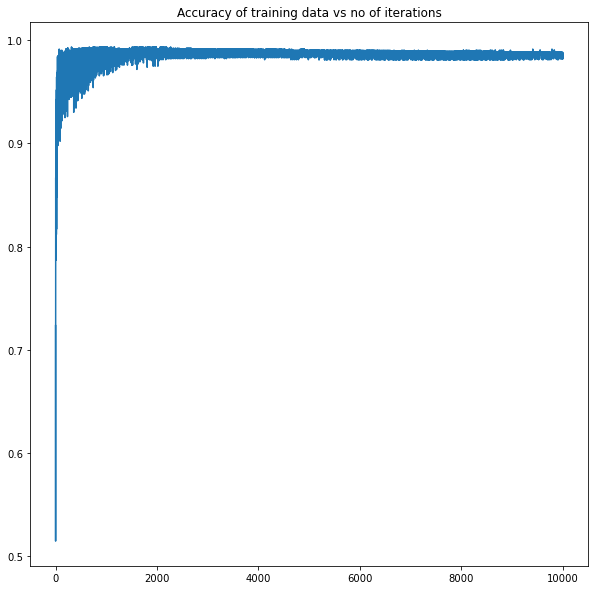

Accuracy of testing data (dataset1) 98.29683698296837


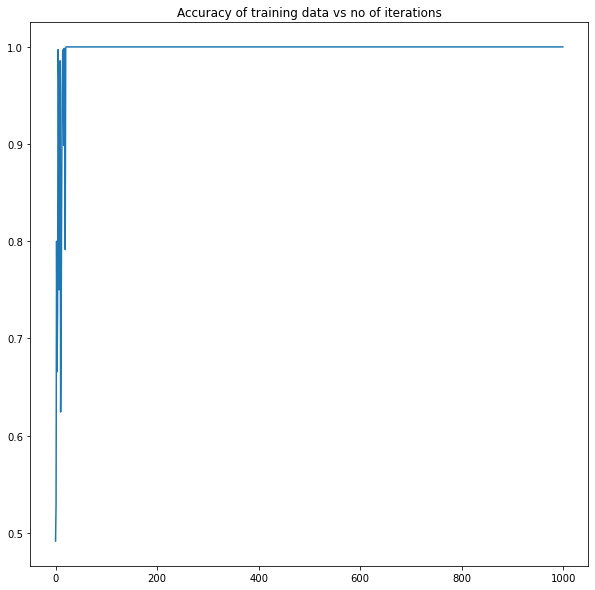

Accuracy of testing data (dataset2) 100.0


In [12]:
#passing values to functions
fname='/Users/durbasatpathi/Desktop/ml/dataset_LP_1.txt'
training_data,testing_data=process_data(fname)
w,x,y=testing(training_data,testing_data,1,10000)
print('Accuracy of testing data (dataset1)',y)
fname1='/Users/durbasatpathi/Desktop/ml/dataset_LP_2.csv'
training_data1,testing_data1=process_data(fname1)
w1,x1,y1=testing(training_data1,testing_data1,1,1000)
print('Accuracy of testing data (dataset2)',y1)
